In [148]:
# imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest ,f_classif ,mutual_info_classif ,VarianceThreshold
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree


In [149]:
data=pd.read_csv("train.csv")
data.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [150]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [151]:
data.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [153]:
# Extract the Discrete columns & continous columns :

Disc_coluns=data.select_dtypes(include=["int64"]).columns
cont_columns=data.select_dtypes(include=["float64"]).columns

print(f"Discrete_columns ---->>> {Disc_coluns} \n Continous_columns ----->>>{cont_columns} ")

Discrete_columns ---->>> Index(['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object') 
 Continous_columns ----->>>Index(['clock_speed', 'm_dep'], dtype='object') 


In [154]:
data["blue"].value_counts()

blue
0    1010
1     990
Name: count, dtype: int64

In [155]:
# Visualization:

<AxesSubplot:ylabel='count'>

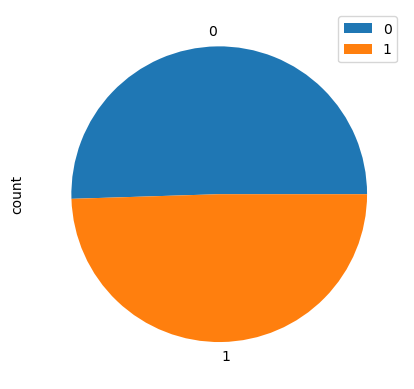

In [156]:
data["blue"].value_counts().plot(kind="pie",legend=True)

<AxesSubplot:xlabel='n_cores'>

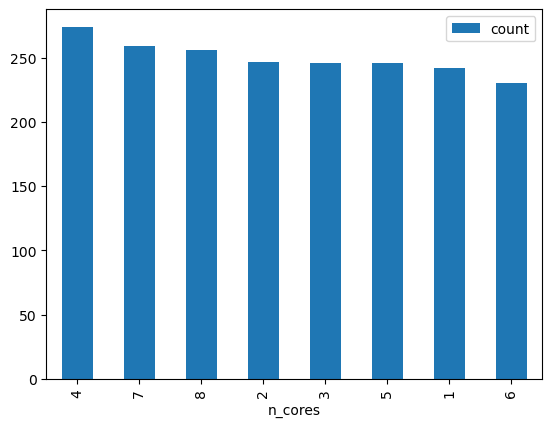

In [157]:
data["n_cores"].value_counts().plot(kind="bar",legend=True)

<AxesSubplot:xlabel='touch_screen'>

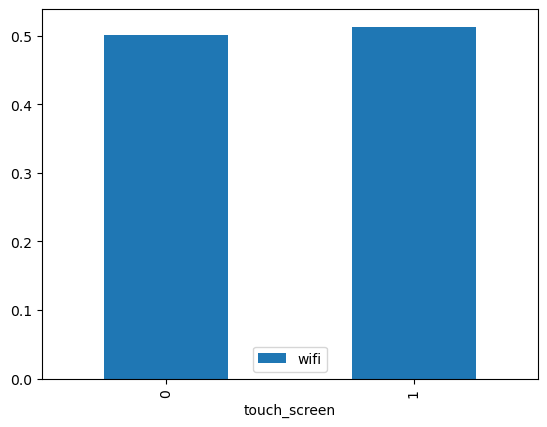

In [158]:
data.groupby(["touch_screen"])["wifi"].mean().sort_values(ascending=True).plot(kind="bar",legend=True)

<AxesSubplot:ylabel='Density'>

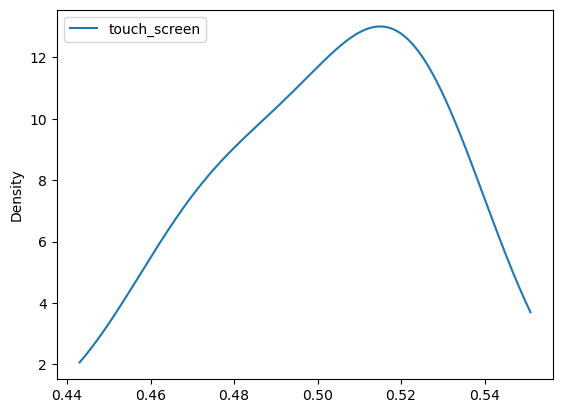

In [159]:
data.groupby(["price_range"])["touch_screen"].mean().plot(kind="kde",legend=True)

In [160]:
# Extract All Discret_columns , Continous columns:

disc_cols=[]
cont_cols=[]


D=data.select_dtypes(include=["int64"]).columns
C=data.select_dtypes(include=["float64"]).columns

disc_cols.append(D)
cont_cols.append(C)

print(f"Discrete_columns ---->>{disc_cols} \n Continous_columns ----->>{cont_cols} ")

Discrete_columns ---->>[Index(['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')] 
 Continous_columns ----->>[Index(['clock_speed', 'm_dep'], dtype='object')] 


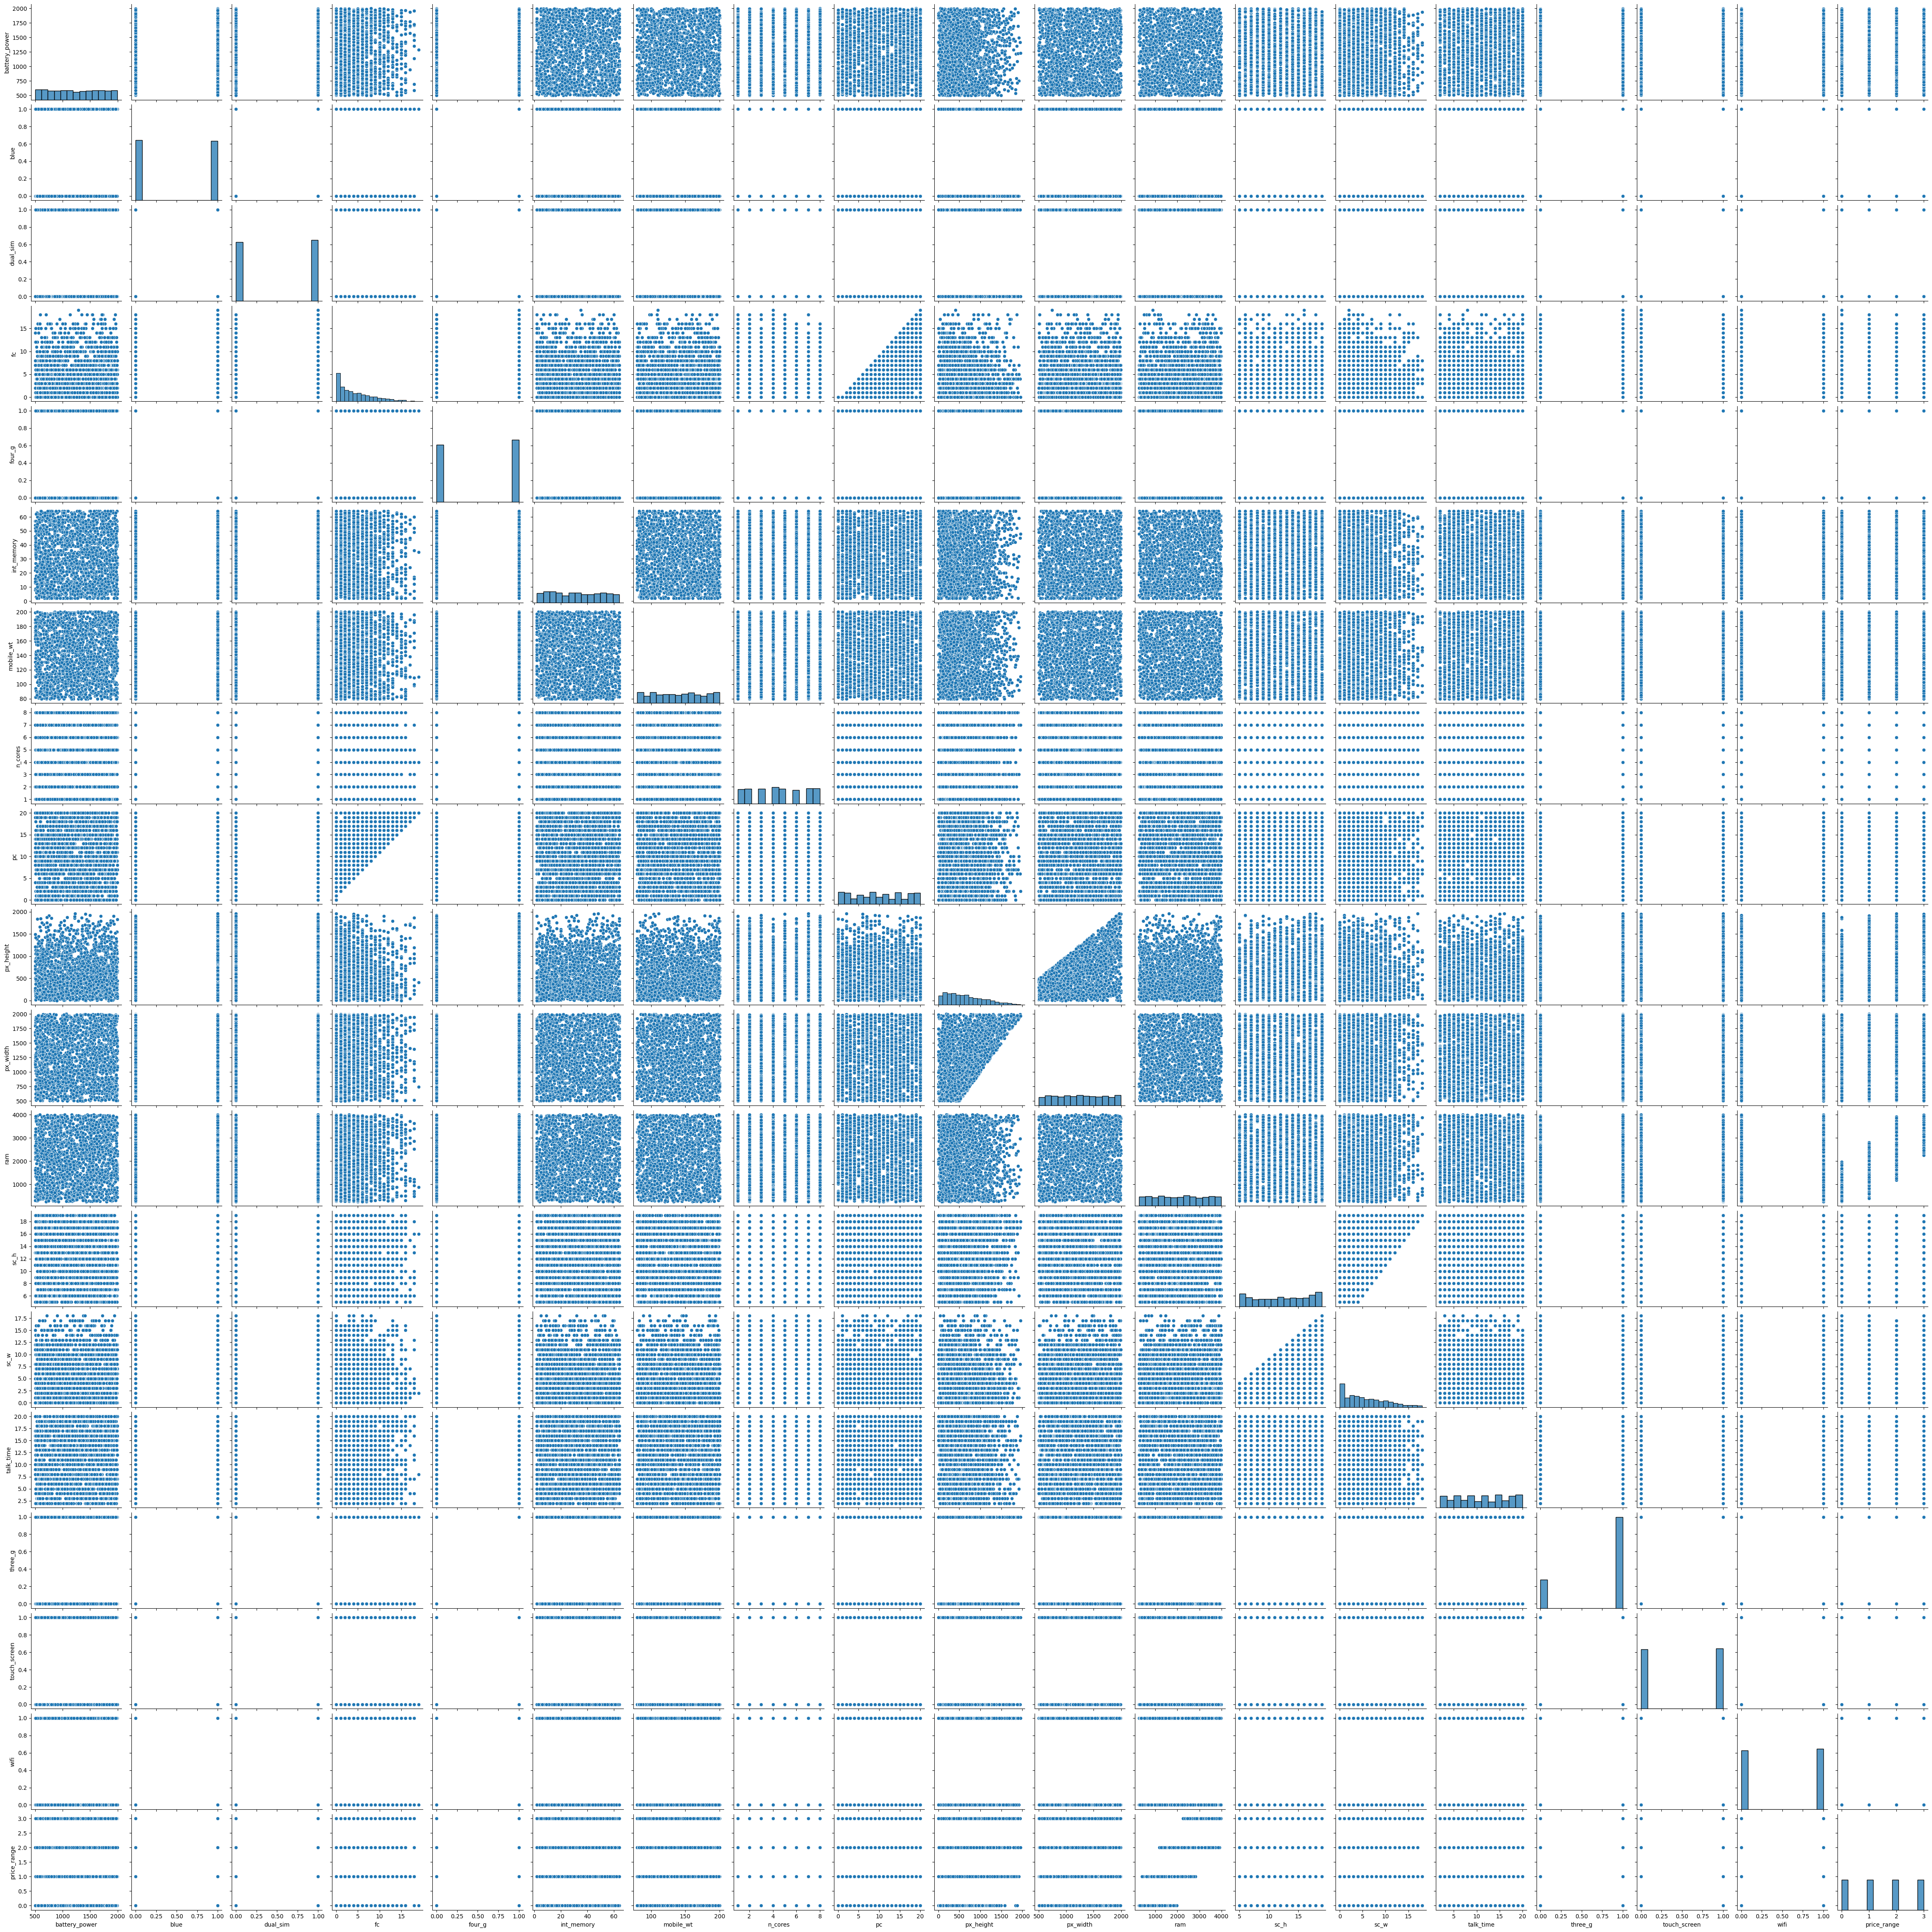

In [161]:
# make the differnt plots for Discrete_columns:

sns.pairplot(data.select_dtypes(include=["int64"]))

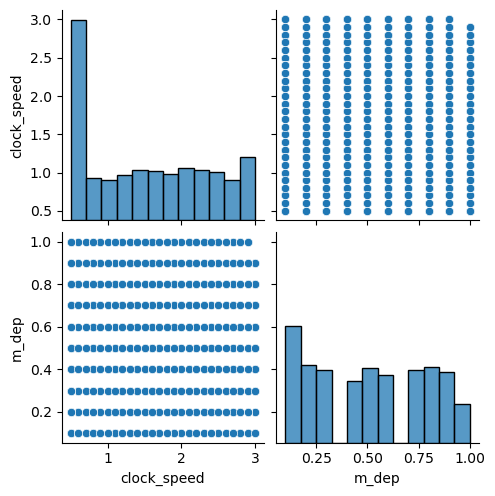

In [162]:
# make the different plots for Continous_columns:

sns.pairplot(data.select_dtypes(include=["float64"]))

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_15800\202866359.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["clock_speed"],shade=True)


<AxesSubplot:xlabel='clock_speed', ylabel='Density'>

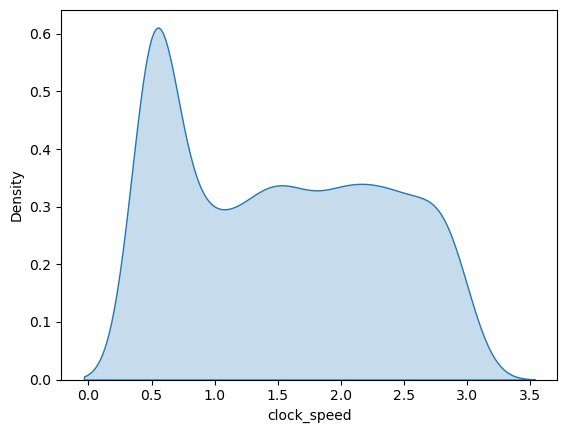

In [163]:
sns.kdeplot(data["clock_speed"],shade=True)

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_15800\3416024487.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["mobile_wt"])


<AxesSubplot:xlabel='mobile_wt', ylabel='Density'>

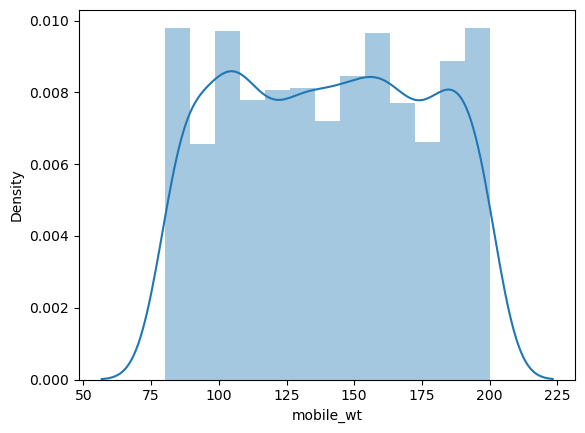

In [164]:
sns.distplot(data["mobile_wt"])

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_15800\2260585792.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["m_dep"])
C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_15800\2260585792.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["clock_speed"])


<AxesSubplot:xlabel='clock_speed', ylabel='Density'>

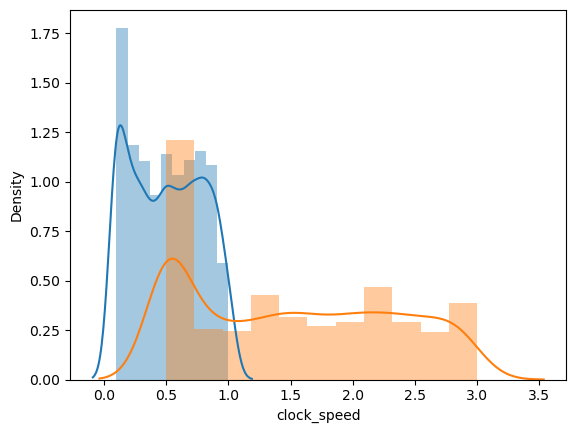

In [165]:
sns.distplot(data["m_dep"])
sns.distplot(data["clock_speed"])

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_15800\1522758660.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["px_height"],shade=True)
C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_15800\1522758660.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data["px_width"],shade=True)


<AxesSubplot:xlabel='px_height', ylabel='Density'>

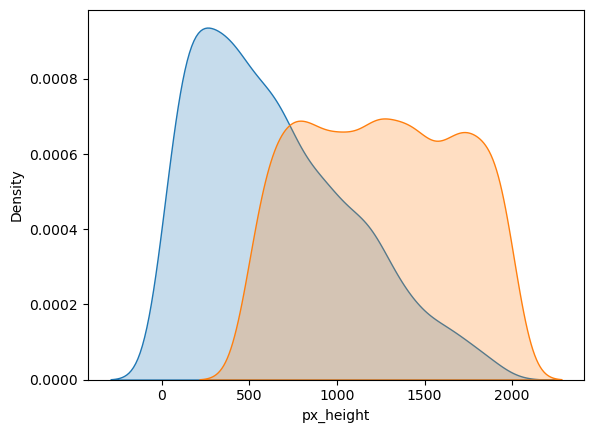

In [166]:
sns.kdeplot(data["px_height"],shade=True)
sns.kdeplot(data["px_width"],shade=True)

C:\Users\EL-Hussein Store\AppData\Local\Temp\ipykernel_15800\601127576.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["price_range"])


<AxesSubplot:xlabel='price_range', ylabel='Density'>

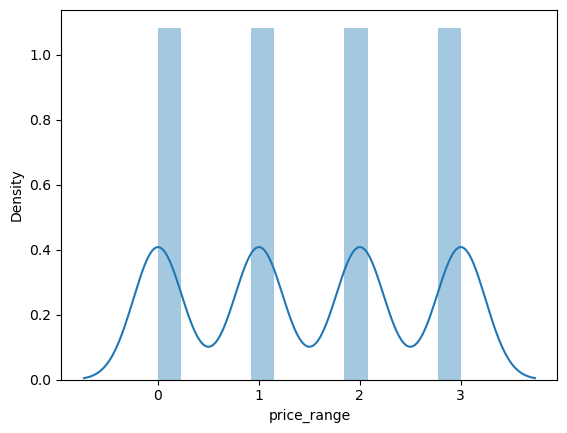

In [167]:
sns.distplot(data["price_range"])

In [168]:
# cleaning the Data:

data.isna().mean()

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [169]:
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [170]:
data.select_dtypes(include=["float64"]).columns

Index(['clock_speed', 'm_dep'], dtype='object')

<AxesSubplot:xlabel='clock_speed'>

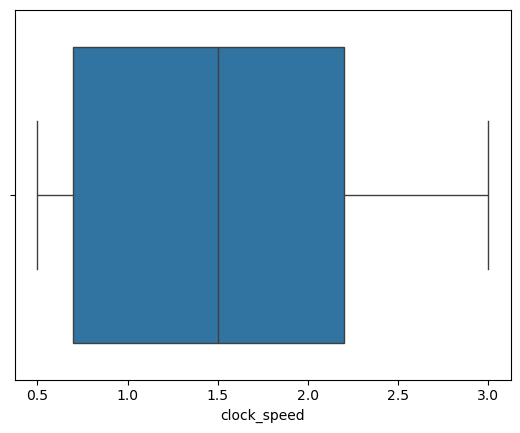

In [171]:
# check the outliers in Continous_columns:

sns.boxplot(x=data["clock_speed"])


<AxesSubplot:xlabel='clock_speed'>

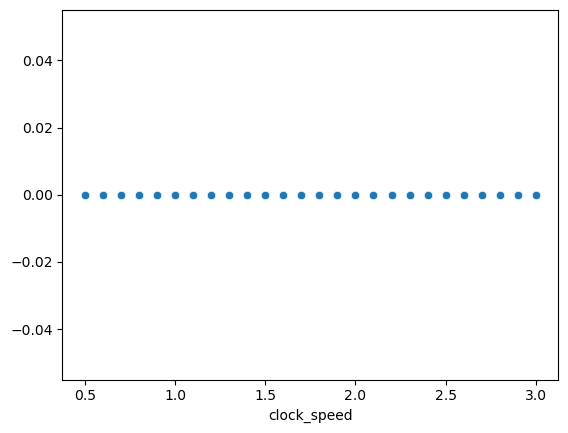

In [172]:
sns.scatterplot(x=data["clock_speed"],y=np.zeros_like(data["clock_speed"]))

In [173]:
# then there is  outlier in clock_speed:


In [174]:
q1,q3=data["clock_speed"].quantile([0.25,0.75])
iqr=q3-q1
low_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr

outliers=[]

for x in data["clock_speed"]:
    if((x>upper_limit) or(low_limit)):
        outliers.append(x)
print("number of outliers=",len(outliers))
print(f"outliers={outliers}")

number of outliers= 2000
outliers=[2.2, 0.5, 0.5, 2.5, 1.2, 0.5, 1.7, 0.5, 0.5, 0.6, 2.9, 2.2, 2.8, 2.1, 0.5, 1.0, 0.5, 0.9, 0.5, 0.5, 1.1, 2.1, 2.6, 2.8, 1.2, 1.4, 1.6, 0.5, 1.6, 0.5, 0.5, 0.5, 0.9, 2.2, 2.7, 1.3, 2.3, 1.6, 2.0, 0.5, 2.9, 2.3, 0.5, 1.0, 2.8, 2.9, 1.1, 1.8, 2.6, 2.1, 3.0, 1.4, 1.5, 1.9, 0.5, 2.1, 2.7, 1.3, 0.5, 1.4, 3.0, 2.3, 1.2, 2.0, 2.6, 1.9, 0.5, 1.4, 1.1, 1.5, 0.5, 2.4, 1.0, 1.2, 2.9, 0.6, 2.8, 1.6, 2.5, 1.0, 0.6, 2.9, 0.9, 0.8, 2.9, 2.4, 2.0, 2.9, 0.5, 1.1, 2.0, 2.0, 2.3, 2.5, 1.7, 1.0, 2.3, 0.5, 2.5, 0.5, 0.5, 1.1, 0.5, 2.8, 2.4, 0.7, 1.9, 2.4, 2.0, 1.5, 1.8, 2.3, 1.4, 1.1, 0.5, 2.3, 1.4, 2.6, 1.3, 0.5, 1.6, 2.4, 0.5, 1.1, 2.0, 2.8, 2.4, 2.3, 0.9, 1.4, 2.0, 2.5, 0.5, 2.9, 1.1, 0.5, 2.5, 0.5, 2.4, 2.6, 0.5, 1.8, 2.5, 2.2, 2.1, 1.4, 1.8, 2.4, 3.0, 1.6, 0.5, 2.2, 2.1, 1.0, 2.9, 2.3, 2.3, 0.5, 2.8, 0.5, 0.7, 1.5, 0.9, 0.9, 2.1, 1.4, 1.7, 2.4, 0.6, 2.8, 0.6, 3.0, 1.2, 0.5, 0.5, 1.7, 0.5, 1.3, 0.8, 2.2, 2.7, 2.4, 0.8, 2.6, 1.2, 2.1, 0.5, 2.6, 0.5, 1.4, 1.4, 1.3, 0.5, 

In [175]:
print(f"value of q1={q1},value of q3={q3} ")
print(f"value of lowwer_limit={low_limit:0.2f} and upper_limit={upper_limit:0.2f}")

value of q1=0.7,value of q3=2.2 
value of lowwer_limit=-1.55 and upper_limit=4.45


<AxesSubplot:xlabel='m_dep'>

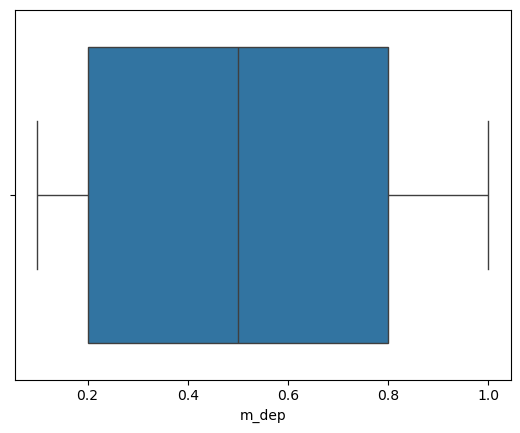

In [176]:
# check the outliers in m_dep column:

sns.boxplot(x=data["m_dep"])

<AxesSubplot:xlabel='m_dep'>

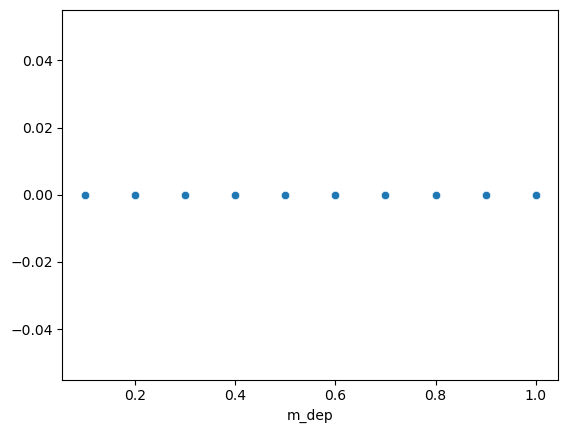

In [177]:
sns.scatterplot(x=data["m_dep"],y=np.zeros_like(data["m_dep"]))

In [178]:
# then there outliers in m_dep:

In [179]:
# calc the outlier in m_dep:

q1_m,q3_m=data["m_dep"].quantile([0.25,0.75])
iqr=q3_m-q1_m
low_limit=q1_m-1.5*iqr
upper_limit=q3_m+1.5*iqr

outliers=[]

for x in data["m_dep"]:
    if((x>upper_limit) or(low_limit)):
        outliers.append(x)
print("number of outliers=",len(outliers))
print(f"outliers={outliers}")

number of outliers= 2000
outliers=[0.6, 0.7, 0.9, 0.8, 0.6, 0.7, 0.8, 0.8, 0.7, 0.1, 0.1, 0.5, 0.6, 1.0, 0.7, 0.7, 0.1, 0.1, 0.6, 1.0, 0.8, 1.0, 0.3, 0.7, 0.4, 0.6, 0.3, 1.0, 0.3, 0.4, 0.2, 1.0, 0.9, 0.6, 0.7, 0.4, 0.6, 0.5, 0.3, 0.3, 0.6, 0.2, 0.2, 0.1, 0.8, 0.2, 1.0, 0.8, 0.2, 0.8, 0.7, 0.8, 0.3, 0.3, 0.5, 0.6, 0.5, 0.4, 0.5, 1.0, 0.6, 0.8, 0.8, 0.5, 0.7, 0.8, 0.3, 0.5, 0.6, 0.8, 0.8, 0.7, 0.1, 0.7, 0.5, 0.9, 0.4, 0.6, 0.2, 0.7, 0.9, 0.2, 0.9, 1.0, 0.8, 0.8, 0.5, 0.8, 0.1, 0.5, 0.5, 1.0, 0.4, 0.7, 0.8, 1.0, 0.2, 0.2, 0.7, 0.4, 0.3, 0.8, 0.7, 0.6, 0.5, 0.7, 1.0, 0.1, 0.3, 0.1, 1.0, 0.5, 0.7, 1.0, 0.6, 0.2, 0.3, 0.9, 0.9, 0.5, 0.3, 0.5, 0.9, 0.8, 0.8, 0.6, 0.3, 0.5, 0.6, 0.1, 0.8, 0.1, 1.0, 0.2, 0.7, 0.5, 0.9, 0.5, 0.3, 0.1, 0.1, 0.5, 0.3, 0.5, 0.9, 0.4, 0.2, 0.5, 0.4, 0.8, 0.1, 0.2, 0.9, 0.7, 0.7, 0.9, 0.8, 0.4, 0.5, 0.7, 0.6, 0.3, 0.5, 0.5, 0.1, 0.8, 0.9, 0.4, 0.2, 0.3, 0.5, 0.1, 0.2, 0.3, 1.0, 0.8, 0.8, 0.1, 0.1, 0.4, 0.3, 0.2, 0.1, 1.0, 0.2, 0.8, 0.1, 0.1, 0.5, 0.9, 0.6, 0.2, 0.3, 

In [180]:
print(f"value of q1={q1_m},value of q3={q3_m} ")
print(f"value of lowwer_limit={low_limit:0.2f} and upper_limit={upper_limit:0.2f}")

value of q1=0.2,value of q3=0.8 
value of lowwer_limit=-0.70 and upper_limit=1.70


In [181]:
# check the outliers in discrete_columns:

data.select_dtypes(include=["int64"]).columns

Index(['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [182]:
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [183]:
# from the last Statistical step we check the outliers on --->blue_column and fc_column as ther is many discrete columns

<AxesSubplot:ylabel='blue'>

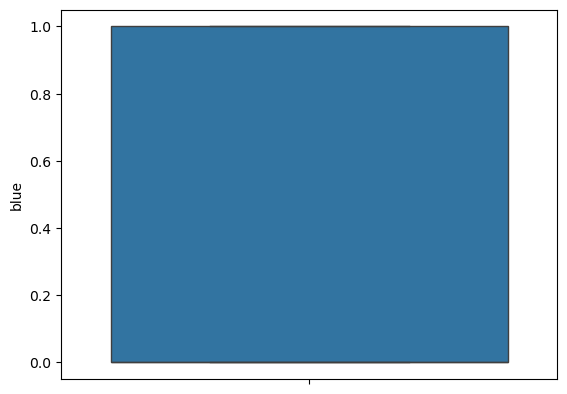

In [184]:
sns.boxplot(y=data["blue"])

<AxesSubplot:xlabel='blue'>

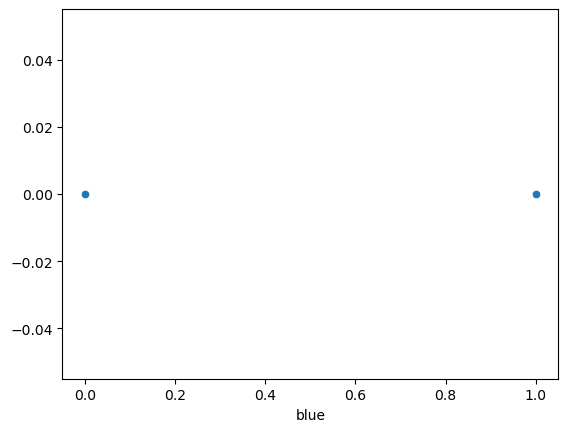

In [185]:
sns.scatterplot(x=data["blue"],y=np.zeros_like(data["blue"]))

<AxesSubplot:ylabel='fc'>

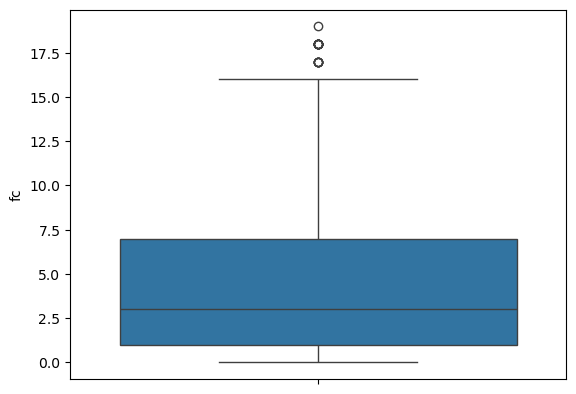

In [186]:
sns.boxplot(y=data["fc"])

<AxesSubplot:xlabel='fc'>

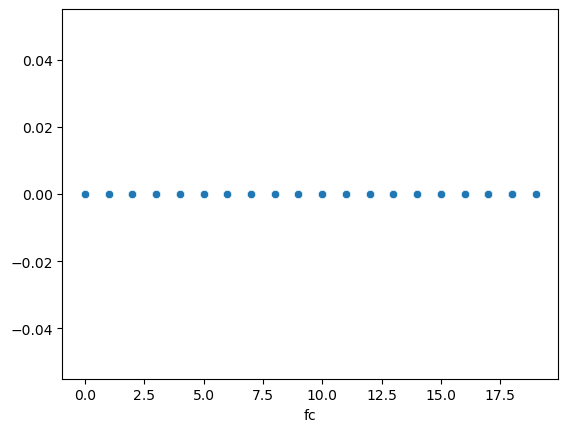

In [187]:
sns.scatterplot(x=data["fc"],y=np.zeros_like(data["fc"]))

In [188]:
# then from the last plot we discover that ther outlier in blue column & fc column:

In [189]:
# calc the outliers in blue :

q1_b,q3_b=data["blue"].quantile([0.25,0.75])
iqr=q3_b-q1_b
low_limit=q1_b-1.5*iqr
upper_limit=q3_b+1.5*iqr

outliers=[]

for x in data["blue"]:
    if((x>upper_limit) or(low_limit)):
        outliers.append(x)
print("number of outliers=",len(outliers))
print(f"outliers={outliers}")
print(f"value of q1={q1_b},value of q3={q3_b} ")
print(f"value of lowwer_limit={low_limit:0.2f} and upper_limit={upper_limit:0.2f}")


number of outliers= 2000
outliers=[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [190]:
# calc the outliers in fc :

q1_fc,q3_fc=data["fc"].quantile([0.25,0.75])
iqr=q3_fc-q1_fc
low_limit=q1_fc-1.5*iqr
upper_limit=q3_fc+1.5*iqr

outliers=[]

for x in data["blue"]:
    if((x>upper_limit) or(low_limit)):
        outliers.append(x)
print("number of outliers=",len(outliers))
print(f"outliers={outliers}")
print(f"value of q1={q1_fc},value of q3={q3_fc} ")
print(f"value of lowwer_limit={low_limit:0.2f} and upper_limit={upper_limit:0.2f}")


number of outliers= 2000
outliers=[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [191]:
# calculate the variance for all data:

disc_var=data.select_dtypes(include=["int64"]).var()
cont_var=data.select_dtypes(include=["float64"]).var()

print(f"Variance for discrete_valus=\n{disc_var}\nVariance for continous_values=\n{cont_var} ")


Variance for discrete_valus=
battery_power    1.930884e+05
blue             2.501001e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
price_range      1.250625e+00
dtype: float64
Variance for continous_values=
clock_speed    0.665863
m_dep          0.083184
dtype: float64 


In [192]:
num_cols=data.select_dtypes("number").columns

In [193]:
# thershold ways to detect the variance in the columns:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


VarianceThreshold(threshold=0.01)

In [194]:
selector.get_support(indices=True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

In [195]:
num_cols[selector.get_support(indices=True)]

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [196]:
# create transformer to remove high and low cardinality categorical or (low-high) varience:

class Var_Selector(BaseEstimator,TransformerMixin):
    
    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])
        
        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)
        
        # remove high-low cardinality categorical:-
        
        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index
        
        return data.drop(columns=removed_cols)
        



In [197]:
data.head(1)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  

[1 rows x 21 columns]

In [198]:
transform=Var_Selector(data)
transform.fit(data)
transform.transform(data)

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [199]:
dft=data.T
duplicates_fs=dft.duplicated().sum()
print(duplicates_fs)

0


In [200]:
data.drop_duplicates()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [201]:
# calc the correlation with the different ways:

data.select_dtypes("number").corr()

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

In [202]:
data.select_dtypes("number").corr(method="spearman")

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011273     0.009161 -0.042033  0.034931   
blue                0.011273  1.000000     0.017336  0.035198  0.001095   
clock_speed         0.009161  0.017336     1.000000 -0.002278 -0.005288   
dual_sim           -0.042033  0.035198    -0.002278  1.000000 -0.038122   
fc                  0.034931  0.001095    -0.005288 -0.038122  1.000000   
four_g              0.015399  0.013443    -0.042833  0.003187 -0.023770   
int_memory         -0.003748  0.040559     0.005447 -0.015557 -0.027282   
m_dep               0.033412  0.002793    -0.014712 -0.021461  0.012780   
mobile_wt           0.001752 -0.008277     0.010773 -0.009260  0.027134   
n_cores            -0.029800  0.036424    -0.008159 -0.024531 -0.015530   
pc                  0.030757 -0.009031    -0.005925 -0.017681  0.659161   
px_height           0.009490 -0.004211    -0.013043 -0.017916 -0.020919   
px_width           -0.009040 -0.041127    -0.008619  0.014149 -0.009170   
ram                -0.001285  0.026130     0.004119  0.041059  0.019897   
sc_h               -0.029283 -0.002838    -0.030092 -0.012950 -0.009578   
sc_w               -0.026544  0.007520    -0.015129 -0.022316 -0.001169   
talk_time           0.052730  0.013777    -0.012699 -0.039379 -0.001404   
three_g             0.011820 -0.030236    -0.044189 -0.014008 -0.013806   
touch_screen       -0.010334  0.010061     0.018471 -0.017117 -0.016291   
wifi               -0.008464 -0.021863    -0.023710  0.022740  0.006774   
price_range         0.199991  0.020573    -0.005436  0.017444  0.024167   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015399   -0.003748  0.033412   0.001752 -0.029800  ...   
blue           0.013443    0.040559  0.002793  -0.008277  0.036424  ...   
clock_speed   -0.042833    0.005447 -0.014712   0.010773 -0.008159  ...   
dual_sim       0.003187   -0.015557 -0.021461  -0.009260 -0.024531  ...   
fc            -0.023770   -0.027282  0.012780   0.027134 -0.015530  ...   
four_g         1.000000    0.008218 -0.000179  -0.016318 -0.030052  ...   
int_memory     0.008218    1.000000  0.007380  -0.034259 -0.028375  ...   
m_dep         -0.000179    0.007380  1.000000   0.022438 -0.004791  ...   
mobile_wt     -0.016318   -0.034259  0.022438   1.000000 -0.019437  ...   
n_cores       -0.030052   -0.028375 -0.004791  -0.019437  1.000000  ...   
pc            -0.005729   -0.033373  0.027605   0.019011 -0.001986  ...   
px_height     -0.022800   -0.001568  0.026156   0.011230 -0.004529  ...   
px_width       0.007862   -0.008511  0.023180   0.000783  0.024329  ...   
ram            0.006839    0.033061 -0.010398  -0.002731  0.005118  ...   
sc_h           0.026659    0.040244 -0.023964  -0.033955  0.000575  ...   
sc_w           0.035122    0.015987 -0.019489  -0.018952  0.029032  ...   
talk_time     -0.046537   -0.002436  0.016665   0.006343  0.013359  ...   
three_g        0.584246   -0.009764 -0.011113   0.001350 -0.015211  ...   
touch_screen   0.016758   -0.028446 -0.001134  -0.014523  0.023807  ...   
wifi          -0.017620    0.007725 -0.028987  -0.000190 -0.009813  ...   
price_range    0.014772    0.044278 -0.000322  -0.030214  0.004651  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.009490 -0.009040 -0.001285 -0.029283 -0.026544   0.052730   
blue           -0.004211 -0.041127  0.026130 -0.002838  0.007520   0.013777   
clock_speed    -0.013043 -0.008619  0.004119 -0.030092 -0.015129  -0.012699   
dual_sim       -0.017916  0.014149  0.041059 -0.012950 -0.022316  -0.039379   
fc             -0.020919 -0.009170  0.019897 -0.009578 -0.001169  -0.001404   
four_g         -0.022800  0.007862  0.006839  0.026659  0.035122  -0.046537   
int_memory     -0.001568 -0.008511  0.033061  0.040244  0.015987  -0.002436   
m_dep           0.026156  0.023180 -0.010398 -0.023964 -0.019489   0.016665   
mo

In [203]:
data.select_dtypes("number").corr(method="pearson")

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

In [204]:
data.select_dtypes("number").corr(method="kendall")

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.009209     0.006603 -0.034340  0.024388   
blue                0.009209  1.000000     0.014596  0.035198  0.000938   
clock_speed         0.006603  0.014596     1.000000 -0.001918 -0.003810   
dual_sim           -0.034340  0.035198    -0.001918  1.000000 -0.032667   
fc                  0.024388  0.000938    -0.003810 -0.032667  1.000000   
four_g              0.012581  0.013443    -0.036062  0.003187 -0.020369   
int_memory         -0.002865  0.033388     0.003745 -0.012807 -0.019190   
m_dep               0.023098  0.002398    -0.010848 -0.018423  0.009543   
mobile_wt           0.001878 -0.006788     0.007501 -0.007594  0.018826   
n_cores            -0.020973  0.031548    -0.006123 -0.021247 -0.011480   
pc                  0.020742 -0.007551    -0.004388 -0.014783  0.523825   
px_height           0.006531 -0.003440    -0.009087 -0.014637 -0.014535   
px_width           -0.005814 -0.033600    -0.005857  0.011559 -0.006597   
ram                -0.000890  0.021343     0.003259  0.033537  0.013798   
sc_h               -0.020212 -0.002395    -0.021466 -0.010929 -0.006786   
sc_w               -0.018511  0.006355    -0.010416 -0.018858 -0.000847   
talk_time           0.036456  0.011543    -0.009458 -0.032993 -0.000524   
three_g             0.009656 -0.030236    -0.037203 -0.014008 -0.011830   
touch_screen       -0.008443  0.010061     0.015551 -0.017117 -0.013959   
wifi               -0.006915 -0.021863    -0.019962  0.022740  0.005805   
price_range         0.148461  0.018780    -0.003844  0.015925  0.018601   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.012581   -0.002865  0.023098   0.001878 -0.020973  ...   
blue           0.013443    0.033388  0.002398  -0.006788  0.031548  ...   
clock_speed   -0.036062    0.003745 -0.010848   0.007501 -0.006123  ...   
dual_sim       0.003187   -0.012807 -0.018423  -0.007594 -0.021247  ...   
fc            -0.020369   -0.019190  0.009543   0.018826 -0.011480  ...   
four_g         1.000000    0.006765 -0.000153  -0.013382 -0.026029  ...   
int_memory     0.006765    1.000000  0.004909  -0.023407 -0.020125  ...   
m_dep         -0.000153    0.004909  1.000000   0.015925 -0.003849  ...   
mobile_wt     -0.013382   -0.023407  0.015925   1.000000 -0.013885  ...   
n_cores       -0.026029   -0.020125 -0.003849  -0.013885  1.000000  ...   
pc            -0.004790   -0.022935  0.020159   0.012742 -0.001510  ...   
px_height     -0.018627   -0.001360  0.018704   0.007914 -0.003274  ...   
px_width       0.006423   -0.005737  0.016253   0.000666  0.017428  ...   
ram            0.005586    0.022375 -0.007041  -0.001588  0.003783  ...   
sc_h           0.022498    0.027785 -0.017843  -0.023864  0.000305  ...   
sc_w           0.029680    0.011268 -0.014479  -0.013791  0.020966  ...   
talk_time     -0.038991   -0.001736  0.012124   0.004527  0.009534  ...   
three_g        0.584246   -0.008037 -0.009540   0.001107 -0.013174  ...   
touch_screen   0.016758   -0.023416 -0.000974  -0.011910  0.020620  ...   
wifi          -0.017620    0.006359 -0.024884  -0.000156 -0.008500  ...   
price_range    0.013485    0.033267 -0.000241  -0.022748  0.003757  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.006531 -0.005814 -0.000890 -0.020212 -0.018511   0.036456   
blue           -0.003440 -0.033600  0.021343 -0.002395  0.006355   0.011543   
clock_speed    -0.009087 -0.005857  0.003259 -0.021466 -0.010416  -0.009458   
dual_sim       -0.014637  0.011559  0.033537 -0.010929 -0.018858  -0.032993   
fc             -0.014535 -0.006597  0.013798 -0.006786 -0.000847  -0.000524   
four_g         -0.018627  0.006423  0.005586  0.022498  0.029680  -0.038991   
int_memory     -0.001360 -0.005737  0.022375  0.027785  0.011268  -0.001736   
m_dep           0.018704  0.016253 -0.007041 -0.017843 -0.014479   0.012124   
mo

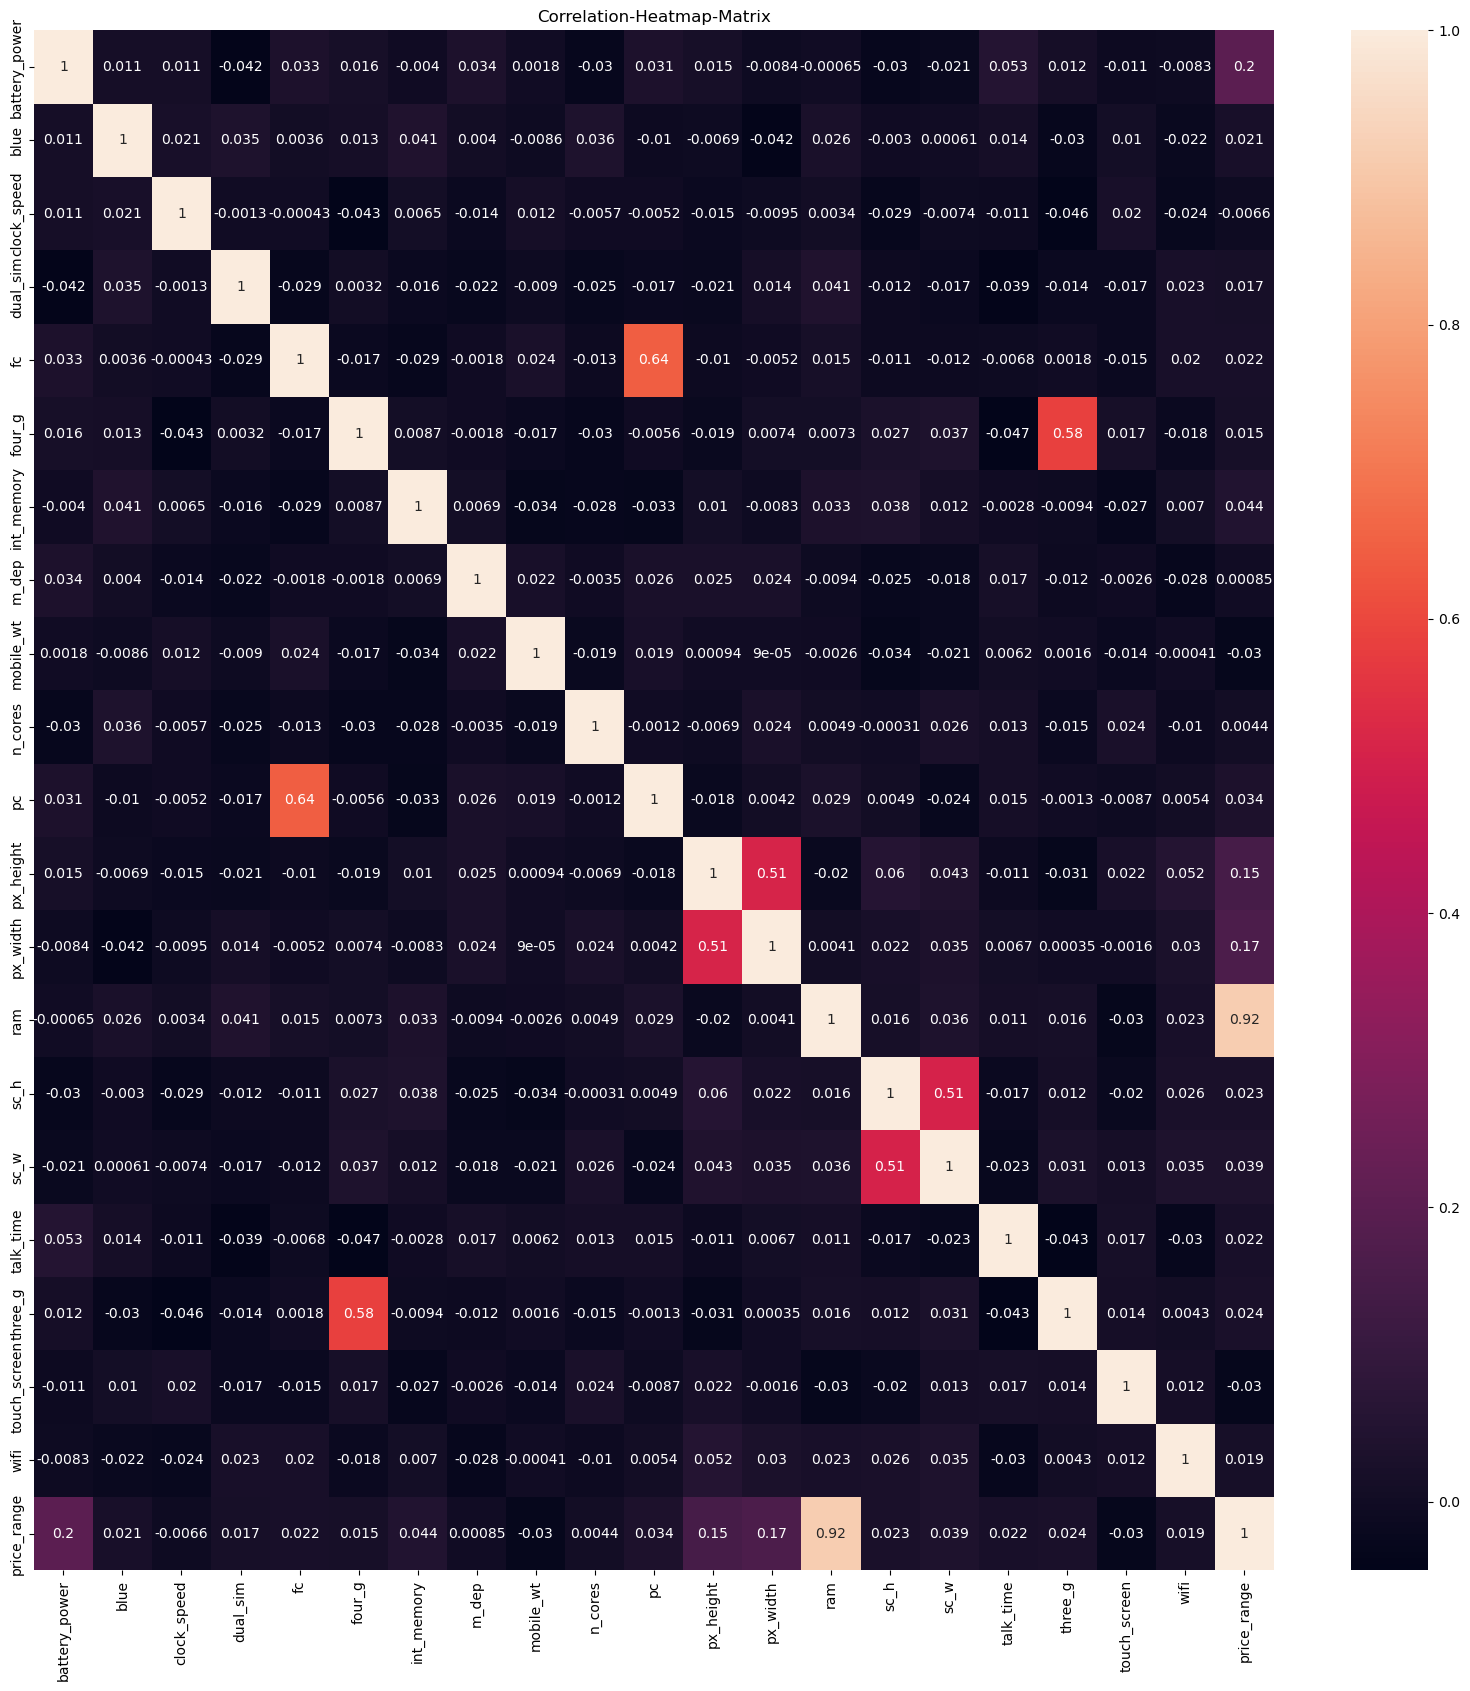

In [205]:
plt.figure(figsize=(20,20))
plt.title("Correlation-Heatmap-Matrix")
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt='.2g')
plt.show()

In [206]:
# way fo select the most 5 Numerical_features(Entrop way):


fs=SelectKBest(score_func=f_classif,k=5)
fs.fit(data.drop(columns="price_range").select_dtypes("number").fillna(0),data["price_range"])



G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


SelectKBest(k=5)

In [207]:
print(["{:10f}".format(p) for p in fs.pvalues_])
print(["{:10f}".format(p) for p in fs.scores_])



['  0.000000', '  0.698483', '  0.686675', '  0.732787', '  0.509504', '  0.365155', '  0.032777', '  0.212459', '  0.013117', '  0.048936', '  0.479749', '  0.000000', '  0.000000', '  0.000000', '  0.083250', '  0.171215', '  0.180669', '  0.712151', '  0.275043', '  0.836307']
[' 31.598158', '  0.476768', '  0.493708', '  0.428239', '  0.772182', '  1.059525', '  2.922996', '  1.500682', '  3.594318', '  2.625415', '  0.825446', ' 19.484842', ' 22.620882', '3520.110824', '  2.225984', '  1.671000', '  1.628811', '  0.457320', '  1.293302', '  0.284940']


In [208]:
features_pvalues=pd.DataFrame(fs.pvalues_)
fatures_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="price_range").select_dtypes("number").fillna(0).columns)

feature_score=pd.concat([features_pvalues,fatures_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

pvalues        score          input
0   5.948688e-20    31.598158  battery_power
1   6.984831e-01     0.476768           blue
2   6.866752e-01     0.493708    clock_speed
3   7.327869e-01     0.428239       dual_sim
4   5.095042e-01     0.772182             fc
5   3.651552e-01     1.059525         four_g
6   3.277694e-02     2.922996     int_memory
7   2.124595e-01     1.500682          m_dep
8   1.311739e-02     3.594318      mobile_wt
9   4.893585e-02     2.625415        n_cores
10  4.797489e-01     0.825446             pc
11  1.886085e-12    19.484842      px_height
12  2.116911e-14    22.620882       px_width
13  0.000000e+00  3520.110824            ram
14  8.324991e-02     2.225984           sc_h
15  1.712146e-01     1.671000           sc_w
16  1.806686e-01     1.628811      talk_time
17  7.121507e-01     0.457320        three_g
18  2.750433e-01     1.293302   touch_screen
19  8.363070e-01     0.284940           wifi

In [209]:
# tranformate the categorical data into floating(numerical) data:

label_encoder=LabelEncoder()

for col in data:
    data[col]=label_encoder.fit_transform(data[col])
data    

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               255     0           17         0   1       0           5   
1               382     1            0         1   0       1          51   
2                48     1            0         1   2       1          39   
3                88     1           20         0   0       0           8   
4               954     1            7         0  13       1          42   
...             ...   ...          ...       ...  ..     ...         ...   
1995            216     1            0         1   0       1           0   
1996           1064     1           21         1   0       0          37   
1997           1027     0            4         1   1       1          34   
1998            732     0            4         0   4       1          44   
1999              8     1           15         1   5       1          43   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0         5        108        1  ...         18       186   963     4     7   
1         6         56        2  ...        738      1099   998    12     3   
2         8         65        4  ...        962       901   984     6     2   
3         7         51        5  ...        935       954  1055    11     8   
4         5         61        1  ...        928       517   499     3     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995      7         26        5  ...        939      1022   180     8     4   
1996      1        107        3  ...        745      1080   732     6    10   
1997      6         28        7  ...        716       834  1158     4     1   
1998      0         65        4  ...        283       120   266    13    10   
1999      8         88        5  ...        413       184  1526    14     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            17        0             0     1            1  
1             5        1             1     0            2  
2             7        1             1     0            2  
3             9        1             0     0            2  
4            13        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         17        1             1     0            0  
1996         14        1             1     1            2  
1997          3        1             1     0            3  
1998         17        1             1     1            0  
1999          0        1             1     1            3  

[2000 rows x 21 columns]

In [210]:
# divive the data:

x=data.drop("price_range",axis=1)
y=data["price_range"]

In [211]:
#train_test_split:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [212]:
# Descission Tree model:

model1=tree.DecisionTreeClassifier(max_depth=3,random_state=42)
model1.fit(x_train,y_train)


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


DecisionTreeClassifier(max_depth=3, random_state=42)

In [213]:
print(f"accuracy ------>>>{model1.score(x_test,y_test)*100:0.2f}%")

accuracy ------>>>74.17%


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [214]:
# prediction with range_price:

text_represention=tree.export_text(model1)
print(text_represention)

|--- feature_13 <= 812.50
|   |--- feature_13 <= 352.50
|   |   |--- feature_11 <= 1032.00
|   |   |   |--- class: 0
|   |   |--- feature_11 >  1032.00
|   |   |   |--- class: 1
|   |--- feature_13 >  352.50
|   |   |--- feature_0 <= 409.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  409.50
|   |   |   |--- class: 1
|--- feature_13 >  812.50
|   |--- feature_13 <= 1179.50
|   |   |--- feature_0 <= 838.50
|   |   |   |--- class: 2
|   |   |--- feature_0 >  838.50
|   |   |   |--- class: 2
|   |--- feature_13 >  1179.50
|   |   |--- feature_0 <= 306.00
|   |   |   |--- class: 3
|   |   |--- feature_0 >  306.00
|   |   |   |--- class: 3



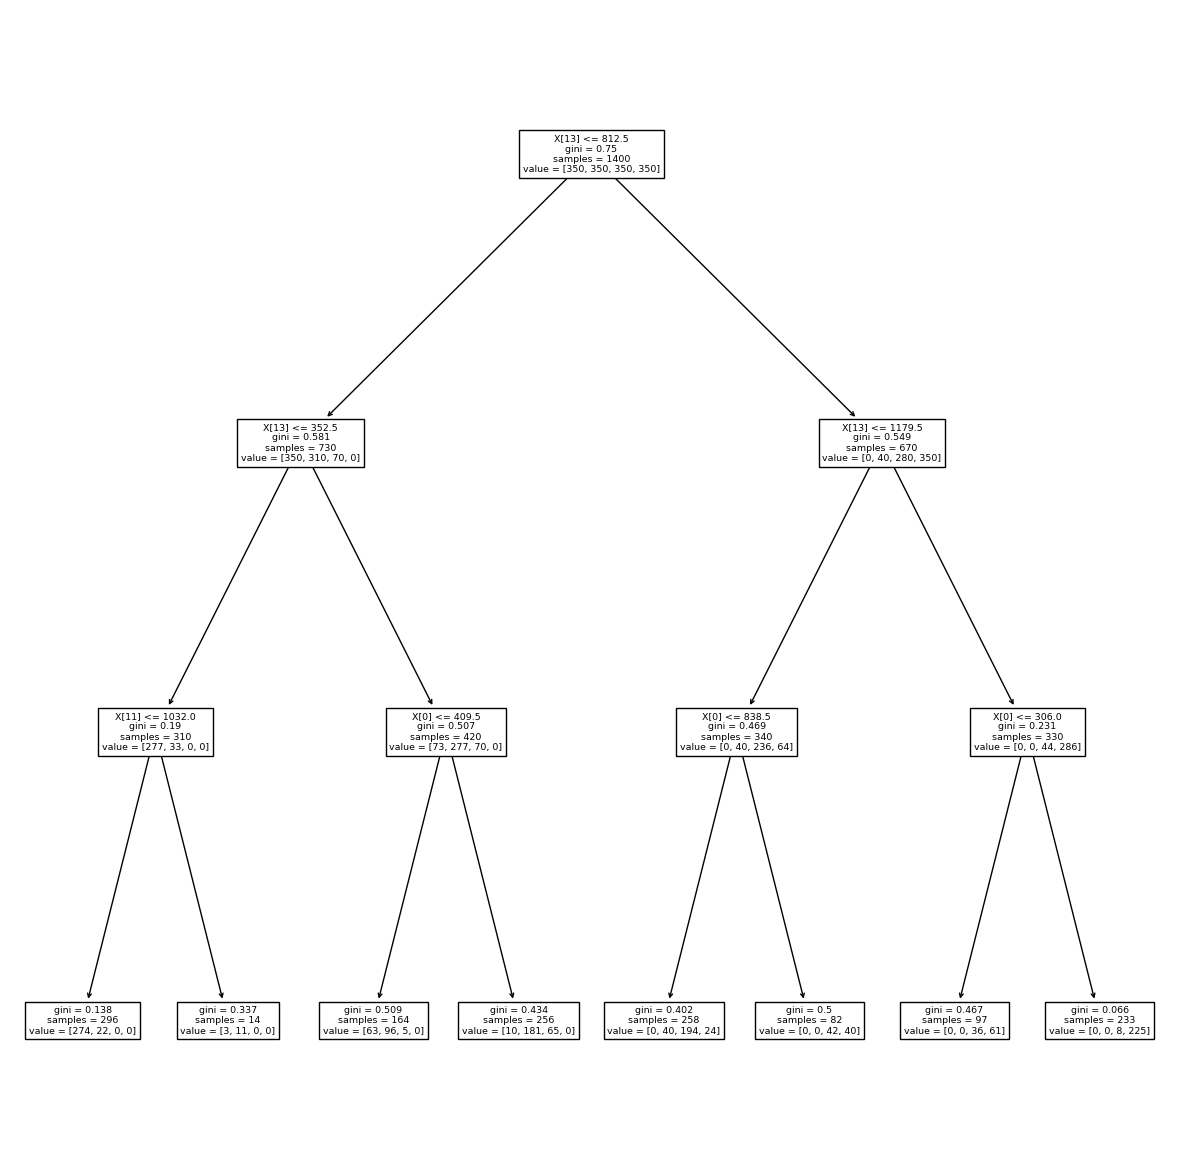

In [215]:
plt.figure(figsize=(15,15))
plt.title("Prediction_Tree")
tree.plot_tree(model1,max_depth=3)
plt.show()

In [216]:
# Random Forest Model
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


RandomForestClassifier()

In [217]:
y_predict=model2.predict(x_test)
y_predict[:10]

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


array([3, 3, 1, 1, 3, 3, 0, 0, 2, 3], dtype=int64)

In [218]:
print(f"accuracy={model2.score(x_test,y_test)*100:0.2f}%")

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


accuracy=87.50%


In [219]:
# improve the accuracity:

np.random.seed()

for x in range(10,101,10):
    print(f"n_estimators = {x}")
    model3=RandomForestClassifier(n_estimators=x).fit(x_train,y_train)
    print(f"accuracy={model3.score(x_test,y_test)*100:0.2f}%")

n_estimators = 10
accuracy=80.67%
n_estimators = 20


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if no

accuracy=83.83%
n_estimators = 30


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


accuracy=86.33%
n_estimators = 40


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


accuracy=86.83%
n_estimators = 50


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


accuracy=87.17%
n_estimators = 60


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


accuracy=87.33%
n_estimators = 70


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


accuracy=85.67%
n_estimators = 80


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


accuracy=88.00%
n_estimators = 90


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


accuracy=87.17%
n_estimators = 100
accuracy=87.67%


G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [220]:
# then from the last : we found that best accuracy at 80 n_estimator it was 89.5% and that mean that accuracity increase by 0.75%

In [221]:
#Suppoer Vector machine Model:

model4=SVC()
model4.fit(x_train,y_train)

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


SVC()

In [222]:
y2_predict=model4.predict(x_test)
y2_predict[:10]

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


array([3, 3, 1, 1, 3, 3, 0, 0, 2, 3], dtype=int64)

In [223]:
print(f"accuracy={model4.score(x_test,y_test)*100:0.2f}%")

G:\Jupter\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


accuracy=96.33%


In [224]:
 # from all pervious model we discoverd that the best accuracy is SVM_model ----->97.25%

In [225]:
# Here is the End of my project:
"""
Devloper >>>>>>> * AbdalRhman Gameel Ahmed Hebishy * <<<<<<<<<

"""

'\nDevloper >>>>>>> * AbdalRhman Gameel Ahmed Hebishy * <<<<<<<<<\n'